# Introduction

The visualizations below show the top and bottom faces side-by-side with the top face on the left. To compare them with a physical cube, you need to orient the latter correctly. The middle slice (the one with a single slit through it) should have its blue edge towards you, red edge to your right, orange edge to your left.

There are two parts to solving the square-1 cube. The first part of the solution disregards colors, merely aiming to make the cube actually cubic.

Outline:

- **Section 1** shows how define the state of the virtual cube and how to visualize it. 

- **Section 2** solves for the shape. Given any initial state, it provides the shortest sequence of steps to make the cube actually cubic. Colors are disregarded.

- **Section 3** simulates color transformations and illustrates some key color-swapping algorithms from the Lars Vandenbergh's solution method (http://www.cubezone.be/square1.html).

# 1. Visualize the state of the cube

## 1.1. Define and visualize an arbitrary shape.

First the top face, then the bottom face.
1 represents a thinner slice (30°). 2 represents a thicker slice (60°).
Identify each slice counterclockwise starting from the side of the slit facing away from you.

A valid configuration must have 8 slices of each kind in total (counting both faces),
and each face must add up to 12 (360°). Use tuples, not lists.

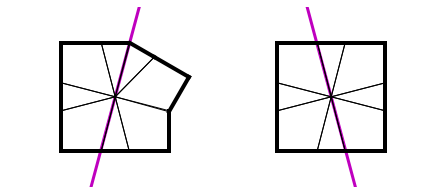

In [1]:
import square1 as sq

top = (1,2,1,2,1,2,2,1)
bot = (2,1,2,1,2,1,2,1)
sq.draw_shape((top,bot))

## 1.2. Define and visualize and arbitrary state

Each slice is identified by the initials of its colors: first the face's color, either w (white) or y (yellow), then the edge color(s), either one (for thin slices) or two (for thick slices) of b (blue), r (red), g (green), or o (orange). For thick slices, the two edge colors should be in counterclockwise order.

A valid cube state can only have one copy of each slice, and the total number of color letters that are not w or y in each face must add up to 12. Use tuples, not lists.

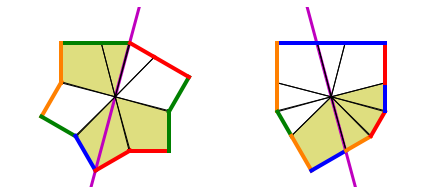

In [2]:
top = ('yg','ygo','wog','ybr','yrg','wgr','wr')
bot = ('wbo','wo','wg','yob','yo','yr','yb','wrb','wb')
sq.draw((top,bot))

# 2. Solve the shape

Enter the current shape of the cube in the cell below, then execute it to see the shortest sequence of steps leading to the cubic shape. At each step, rotate the top and bottom faces  to achieve the configuration on the screen, then twist the right half 180°.

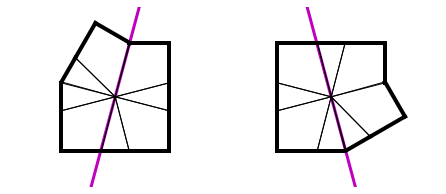

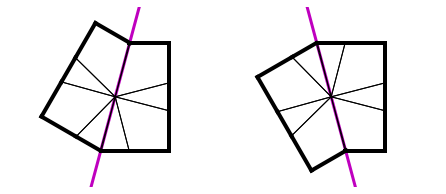

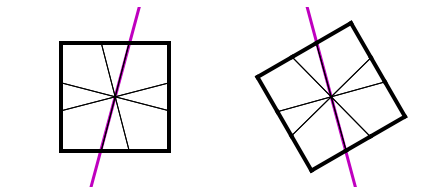

In [3]:
top = (1,2,1,2,1,2,2,1)
bot = (1,2,2,1,2,1,2,1)

p0  = sq.identify_pair(top,bot)
for p,s in sq.solution_dict[p0]:
    top,bot = sq.turn_shape(p[0],s[0]),sq.turn_shape(p[1],s[1])
    sq.draw_shape((top,bot))

# 3. Visualize color transformations

This section is based on Lars Vandenbergh's solution method from http://www.cubezone.be/square1.html. The method is based on a handful of algorithms, each of which performs a specific type of color swap. Here we perform those algorithms on the virtual cube and show every intermediate step.

The algorithm notation is described on the website. In short, each move looks something like this `(3,-1) /`. This means `rotate this top face by 3 increments, rotate the bottom face by -1 increments, then twist the right half 180°`. One rotation increment corresponds to the width of a thin slice, or 30°. The sign indicates the direction of rotation: + for clockwise, - for counterclockwise. This is assessed when facing the face to be rotated.

The cells below illustrate the main algorithms by showing the result of applying them to an already-solved cube. Set `show_steps=True` to see every intermediate step, or `show_steps=False` to see the initial and final states only.

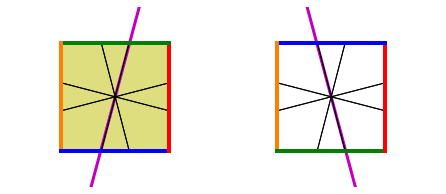

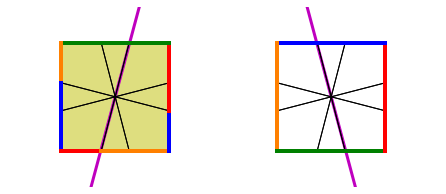

In [4]:
''' Swap the two front corners in top face. '''

# seq = '/ (3,-3) / (3,0) / (-3,0) / (0,3) / (-3,0) /' # As found on http://www.cubezone.be.
seq = '/ (3,-3) / (3,0) / (-3,0) / (0,3) / (-3,0) / (3,0)' # With added quarter turn at the end.
sq.draw(sq.solved_cube)
sq.draw(sq.parse_sequence(seq)(sq.solved_cube, show_steps=False))

In [ ]:
''' Swap the front and right edges in the top face. '''

seq = '/ (-3,0) / (0,3) / (0,-3) / (0,3) / (2,0) / (0,2) / (-2,0) / (4,0) / (0,-2) / (0,2) / (-1,4) / (0,-3) / (0,3)'
sq.draw(sq.solved_cube)
sq.draw(sq.parse_sequence(seq)(sq.solved_cube, show_steps=False))

In [ ]:
''' Swap the left and right edges in the top face. '''

seq = '/ (3,3) / (-1,0) / (2,-4) / (4,-2) / (0,-2) / (-4,2) / (1,-5) / (3,0) / (3,3) / (3,0)'
sq.draw(sq.solved_cube)
sq.draw(sq.parse_sequence(seq)(sq.solved_cube, show_steps=False))

In [ ]:
''' Cyclic permutation of back three edges in the top face. '''

sq.draw(sq.solved_cube)

# Clockwise.
seq = '/ (3,0) / (1,0) / (0,-3) / (-1,0) / (-3,0) / (1,0) / (0,3) / (-1,0)'
sq.draw(sq.parse_sequence(seq)(sq.solved_cube, show_steps=False))

# # Counterclockwise.
# seq = '(1,0) / (0,-3) / (-1,0) / (3,0) / (1,0) / (0,3) / (-1,0) / (-3,0) /'
# sq.draw(sq.parse_sequence(seq)(sq.solved_cube, show_steps=False))